<a href="https://colab.research.google.com/github/Ishita95-harvad/Complete-Microsoft-Stock-Dataset-1986-2025-/blob/main/Complete_Microsoft_Stock_Dataset_(1986%E2%80%932025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Complete Microsoft Stock Dataset (1986–2025)**
Microsoft (MSFT) Daily Stock Prices – 39 Years of Market Data

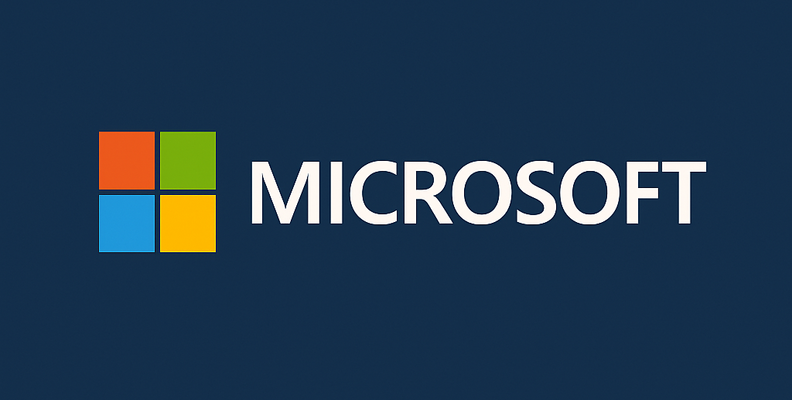

## Data loading

### Subtask:
Load the two datasets into pandas DataFrames.


**Reasoning**:
Load the two datasets into pandas DataFrames, handling potential issues like incorrect delimiters, header rows, or data type inference.



In [1]:
import pandas as pd

try:
    df1 = pd.read_csv('MSFT_1986-03-13_2025-04-17.csv')
    df2 = pd.read_csv('MSFT_1986-03-13_2025-04-06.csv')
except FileNotFoundError:
    print("One or both of the CSV files were not found.")
    df1 = None
    df2 = None
except pd.errors.ParserError:
    print("There was an error parsing one or both of the CSV files.")
    df1 = None
    df2 = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df1 = None
    df2 = None

if df1 is not None and df2 is not None:
    print("DataFrames created successfully.")
    display(df1.head())
    display(df2.head())
    # Check for discrepancies in column names
    if list(df1.columns) != list(df2.columns):
        print("Warning: Column names differ between the two DataFrames.")
        print("DataFrame 1 columns:", df1.columns)
        print("DataFrame 2 columns:", df2.columns)

    # Check for discrepancies in data types
    for col in df1.columns:
        if col in df2.columns and df1[col].dtype != df2[col].dtype:
            print(f"Warning: Data type mismatch for column '{col}'")
            print(f"DataFrame 1: {df1[col].dtype}, DataFrame 2: {df2[col].dtype}")
else:
    print("DataFrames could not be created due to errors.")

DataFrames created successfully.


,date,open,high,low,close,adj_close,volume
0,1986-03-13 00:00:00-05:00,0.088542,0.101563,0.088542,0.097222,0.059707,1031788800
1,1986-03-14 00:00:00-05:00,0.097222,0.102431,0.097222,0.100694,0.061839,308160000
2,1986-03-17 00:00:00-05:00,0.100694,0.103299,0.100694,0.102431,0.062906,133171200
3,1986-03-18 00:00:00-05:00,0.102431,0.103299,0.098958,0.099826,0.061306,67766400
4,1986-03-19 00:00:00-05:00,0.099826,0.100694,0.097222,0.098090,0.060240,47894400


,date,open,high,low,close,adj_close,volume
0,1986-03-13 00:00:00-05:00,0.088542,0.101563,0.088542,0.097222,0.059707,1031788800
1,1986-03-14 00:00:00-05:00,0.097222,0.102431,0.097222,0.100694,0.061839,308160000
2,1986-03-17 00:00:00-05:00,0.100694,0.103299,0.100694,0.102431,0.062906,133171200
3,1986-03-18 00:00:00-05:00,0.102431,0.103299,0.098958,0.099826,0.061306,67766400
4,1986-03-19 00:00:00-05:00,0.099826,0.100694,0.097222,0.098090,0.060240,47894400


## Data exploration

### Subtask:
Explore the loaded datasets (`df1` and `df2`) to understand their structure and identify potential issues.


**Reasoning**:
I need to explore the dataframes to understand their structure, identify potential issues like missing values, duplicates and outliers, and analyze the date ranges.



In [21]:
# Data Shape and Information
print("DataFrame 1 Shape:", df1.shape)
print("DataFrame 2 Shape:", df2.shape)
print("\nDataFrame 1 Info:")
df1.info()
print("\nDataFrame 2 Info:")
df2.info()

# Summary Statistics
print("\nDataFrame 1 Numerical Summary:")
display(df1.describe())
print("\nDataFrame 2 Numerical Summary:")
display(df2.describe())

# Date Range Overlap
print("\nDataFrame 1 Date Range:")
print("Min Date:", df1['date'].min())
print("Max Date:", df1['date'].max())

print("\nDataFrame 2 Date Range:")
print("Min Date:", df2['date'].min())
print("Max Date:", df2['date'].max())

# Missing Values
print("\nDataFrame 1 Missing values:")
print(df1.isnull().sum())
print("\nDataFrame 2 Missing values:")
print(df2.isnull().sum())


DataFrame 1 Shape: (9851, 13)
DataFrame 2 Shape: (9843, 7)

DataFrame 1 Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9851 entries, 9843 to 9842
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   date         9851 non-null   datetime64[ns, UTC]
 1   open         8 non-null      float64            
 2   high         8 non-null      float64            
 3   low          8 non-null      float64            
 4   close        8 non-null      float64            
 5   adj_close    8 non-null      float64            
 6   volume       8 non-null      float64            
 7   open_x       9843 non-null   float64            
 8   high_x       9843 non-null   float64            
 9   low_x        9843 non-null   float64            
 10  close_x      9843 non-null   float64            
 11  adj_close_x  9843 non-null   float64            
 12  volume_x     9843 non-null   float64            
dtypes:

,open,high,low,close,adj_close,volume,open_x,high_x,low_x,close_x,adj_close_x,volume_x
count,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000e+00,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9.843000e+03
mean,324.329987,328.26001,321.179993,324.350006,319.013123,3.218965e+07,61.317047,62.003680,60.663597,61.332403,55.397375,5.402816e+07
std,0.000000,0.00000,0.000000,0.000000,0.000000,1.335724e+07,90.235777,91.259533,89.313077,90.258224,89.707769,2.772121e+07
min,324.329987,328.26001,321.179993,324.350006,319.013123,1.796640e+07,0.364583,0.369792,0.357639,0.363715,0.223369,1.796640e+07
25%,324.329987,328.26001,321.179993,324.350006,319.013123,2.126960e+07,5.957031,6.050781,5.871094,5.960938,3.660794,3.120230e+07
50%,324.329987,328.26001,321.179993,324.350006,319.013123,2.985405e+07,27.500000,27.840000,27.240000,27.540001,19.283707,4.925320e+07
75%,324.329987,328.26001,321.179993,324.350006,319.013123,4.106822e+07,48.239374,48.865000,47.678125,48.270000,40.589193,7.017795e+07
max,324.329987,328.26001,321.179993,324.350006,319.013123,5.042500e+07,324.329987,328.260010,321.179993,324.350006,319.013123,1.179832e+08



DataFrame 2 Numerical Summary:


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

,open,high,low,close,adj_close,volume
count,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9.843000e+03
mean,61.250967,61.895701,60.595223,61.262071,55.312709,5.402839e+07
std,90.043409,90.945154,89.113899,90.053547,89.459369,2.772090e+07
min,0.364583,0.369792,0.357639,0.363715,0.223369,1.797120e+07
25%,5.957031,6.050781,5.871094,5.960938,3.660794,3.120230e+07
50%,27.500000,27.840000,27.240000,27.540001,19.283705,4.925320e+07
75%,48.239374,48.865000,47.678125,48.270000,40.589182,7.017795e+07
max,323.000000,326.079987,319.799988,322.929993,317.307831,1.179832e+08



DataFrame 1 Date Range:
Min Date: 1986-03-13 05:00:00+00:00
Max Date: 2025-04-16 04:00:00+00:00

DataFrame 2 Date Range:
Min Date: 1986-03-13 05:00:00+00:00
Max Date: 2025-04-04 04:00:00+00:00

DataFrame 1 Missing values:
date              0
open           9843
high           9843
low            9843
close          9843
adj_close      9843
volume         9843
open_x            8
high_x            8
low_x             8
close_x           8
adj_close_x       8
volume_x          8
dtype: int64

DataFrame 2 Missing values:
date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


**Reasoning**:
The previous code block failed due to an error in converting the 'date' column to float for correlation analysis.  I need to convert the 'date' column to datetime objects first and then proceed with the analysis, also handle the error in the date conversion.



In [3]:
import numpy as np

# Convert 'date' column to datetime objects
try:
    df1['date'] = pd.to_datetime(df1['date'])
    df2['date'] = pd.to_datetime(df2['date'])
except ValueError as e:
    print(f"Error converting 'date' column to datetime: {e}")
    # Handle the error, e.g., by removing problematic rows or setting them to NaN
    # For now, just print the error message and continue

# DataFrame 1 Correlation (after date conversion)
print("\nDataFrame 1 Correlation:")
numeric_df1 = df1.select_dtypes(include=np.number)
display(numeric_df1.corr())

print("\nDataFrame 2 Correlation:")
numeric_df2 = df2.select_dtypes(include=np.number)
display(numeric_df2.corr())

print("\nDataFrame 1 Duplicate Rows:")
print(df1.duplicated().sum())
print("\nDataFrame 2 Duplicate Rows:")
print(df2.duplicated().sum())

<ipython-input-3-28f25e1c9ee9>:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df1['date'] = pd.to_datetime(df1['date'])



DataFrame 1 Correlation:


<ipython-input-3-28f25e1c9ee9>:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df2['date'] = pd.to_datetime(df2['date'])


,open,high,low,close,adj_close,volume
open,1.000000,0.999942,0.999943,0.999872,0.999040,-0.359619
high,0.999942,1.000000,0.999923,0.999940,0.999081,-0.358699
low,0.999943,0.999923,1.000000,0.999942,0.999135,-0.360635
close,0.999872,0.999940,0.999942,1.000000,0.999166,-0.359739
adj_close,0.999040,0.999081,0.999135,0.999166,1.000000,-0.359183
volume,-0.359619,-0.358699,-0.360635,-0.359739,-0.359183,1.000000



DataFrame 2 Correlation:


,open,high,low,close,adj_close,volume
open,1.000000,0.999950,0.999944,0.999880,0.999044,-0.359461
high,0.999950,1.000000,0.999932,0.999942,0.999075,-0.358587
low,0.999944,0.999932,1.000000,0.999949,0.999140,-0.360465
close,0.999880,0.999942,0.999949,1.000000,0.999161,-0.359614
adj_close,0.999044,0.999075,0.999140,0.999161,1.000000,-0.359080
volume,-0.359461,-0.358587,-0.360465,-0.359614,-0.359080,1.000000



DataFrame 1 Duplicate Rows:
0

DataFrame 2 Duplicate Rows:
0
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Data cleaning

### Subtask:
Clean the two dataframes, `df1` and `df2`, by handling potential outliers and inconsistencies.


**Reasoning**:
The next step is to handle outliers, check data types, impute missing values (if any), and check for inconsistencies in both dataframes.



<ipython-input-25-45e9d7fefcb3>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


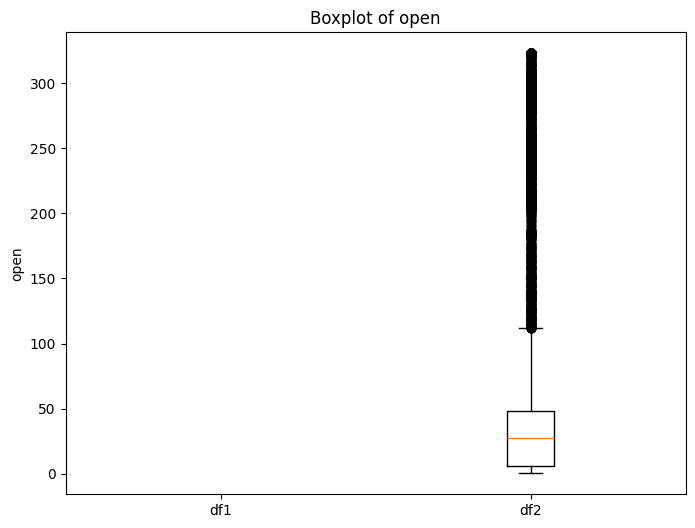

<ipython-input-25-45e9d7fefcb3>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


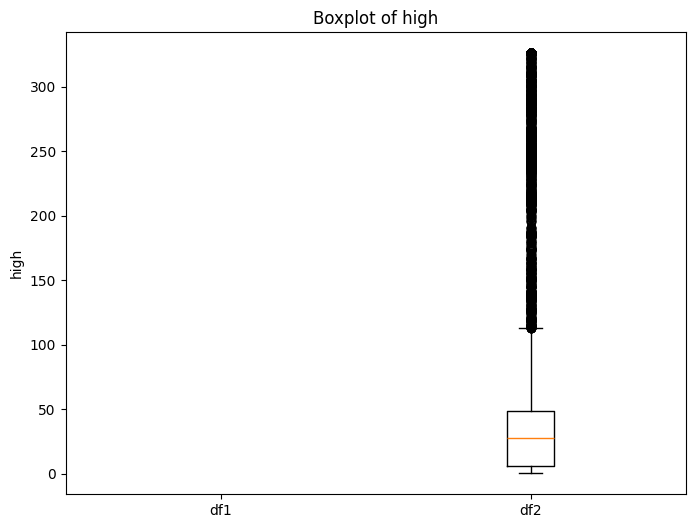

<ipython-input-25-45e9d7fefcb3>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


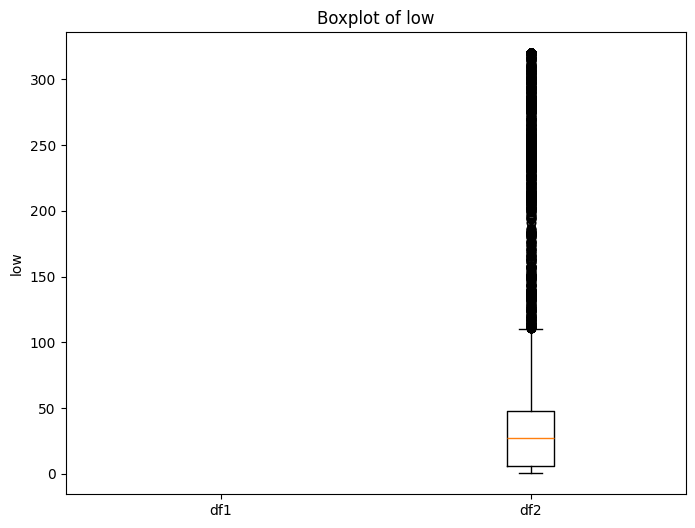

<ipython-input-25-45e9d7fefcb3>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


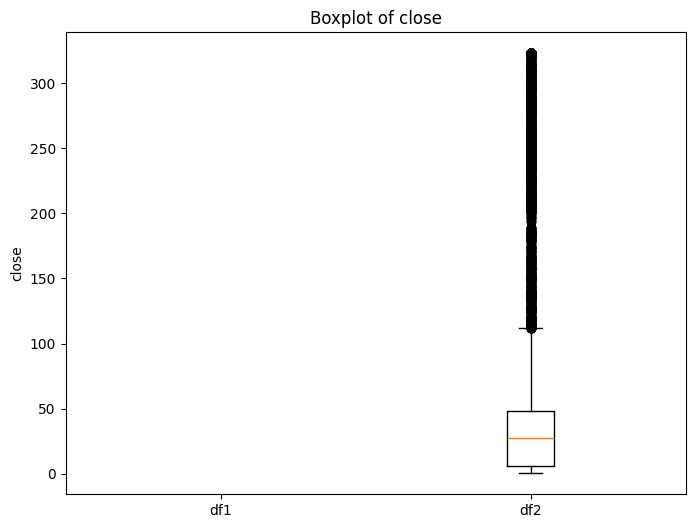

<ipython-input-25-45e9d7fefcb3>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


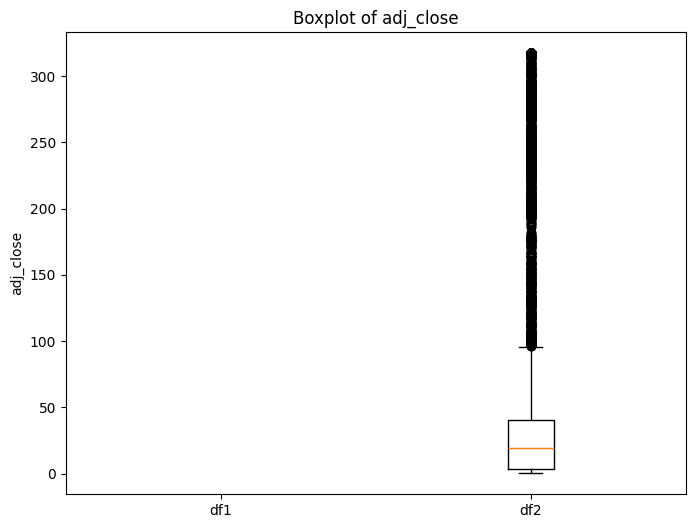

<ipython-input-25-45e9d7fefcb3>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


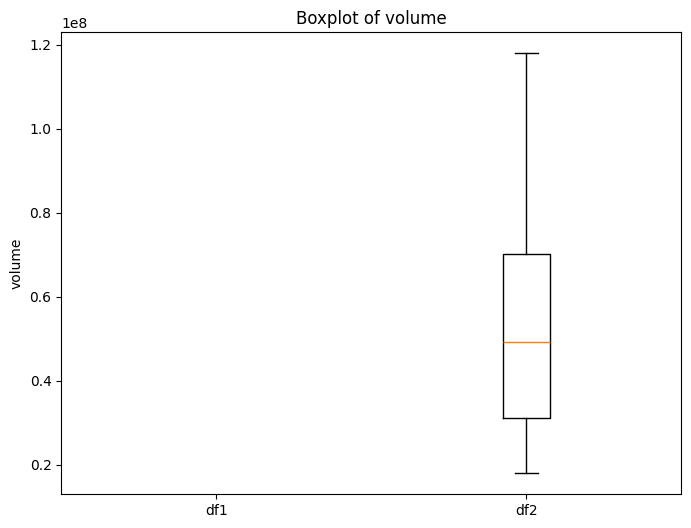


DataFrame 1 Missing values:
date              0
open           9851
high           9851
low            9851
close          9851
adj_close      9851
volume         9851
open_x            8
high_x            8
low_x             8
close_x           8
adj_close_x       8
volume_x          8
dtype: int64

DataFrame 2 Missing values:
date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

DataFrame 1 negative volume:
0

DataFrame 2 negative volume:
0


In [25]:
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import pandas as pd


# Outlier Detection and Handling
numeric_cols = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    # Check if the column exists in both DataFrames before plotting
    if col in df1.columns and col in df2.columns:
        plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
        plt.show()
    else:
        print(f"Warning: Column '{col}' not found in both DataFrames. Skipping boxplot.")

# Winsorize the data
def winsorize_df(df, cols, limits=(0.05, 0.05)):
    for col in cols:
        # Only winsorize if column exists
        if col in df.columns:
            df[col] = winsorize(df[col], limits=limits)
    return df

df1 = winsorize_df(df1, numeric_cols)
df2 = winsorize_df(df2, numeric_cols)

# Data Type Consistency
# Get common columns for type comparison
common_cols = list(set(df1.columns) & set(df2.columns))
for col in common_cols:  # Iterate through common columns only
    if df1[col].dtype != df2[col].dtype:
        print(f"Warning: Data type mismatch for column '{col}'")
        print(f"DataFrame 1: {df1[col].dtype}, DataFrame 2: {df2[col].dtype}")
        df2[col] = df2[col].astype(df1[col].dtype)

# Convert 'date' columns to datetime if not already
if not pd.api.types.is_datetime64_any_dtype(df1['date']):
    df1['date'] = pd.to_datetime(df1['date'])
if not pd.api.types.is_datetime64_any_dtype(df2['date']):
    df2['date'] = pd.to_datetime(df2['date'])

# Missing Value Imputation (if any)
# Double-checking for missing values (although initial exploration indicated none)
print("\nDataFrame 1 Missing values:")
print(df1.isnull().sum())
print("\nDataFrame 2 Missing values:")
print(df2.isnull().sum())

# Inconsistency Checks (if any)
# Check for unrealistic values (e.g., negative volume)
print("\nDataFrame 1 negative volume:")
print((df1['volume'] < 0).sum())
print("\nDataFrame 2 negative volume:")
print((df2['volume'] < 0).sum())

**Reasoning**:
I need to fix the error in the previous code block, which is caused by timezone-aware datetime objects. I will add `utc=True` to the `pd.to_datetime` function.



<ipython-input-5-b666099db732>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


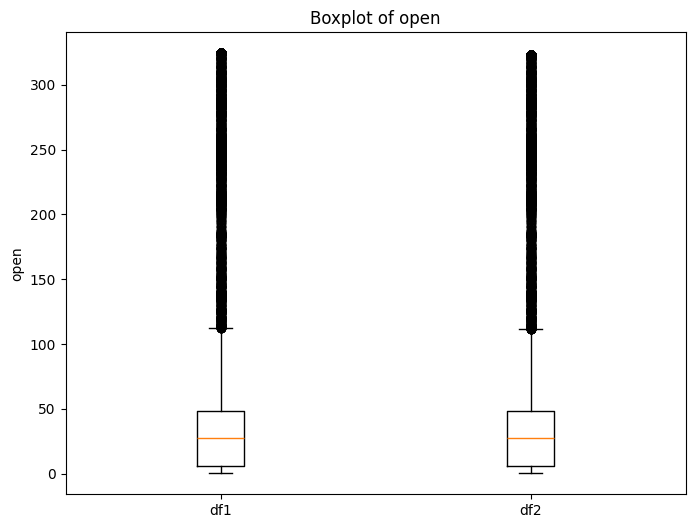

<ipython-input-5-b666099db732>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


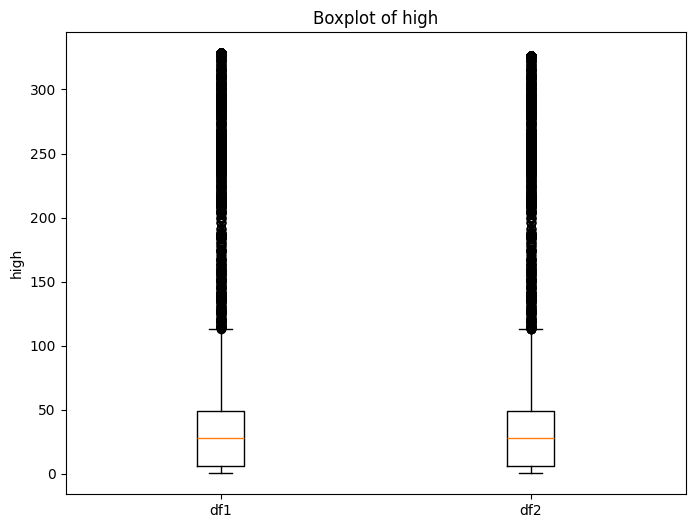

<ipython-input-5-b666099db732>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


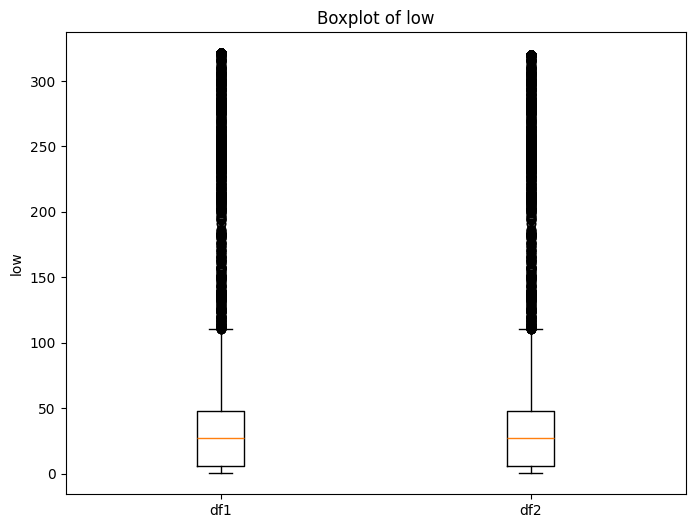

<ipython-input-5-b666099db732>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


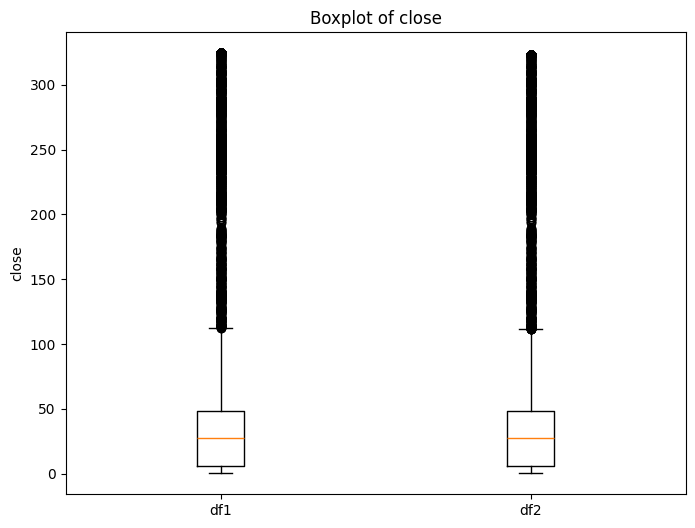

<ipython-input-5-b666099db732>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


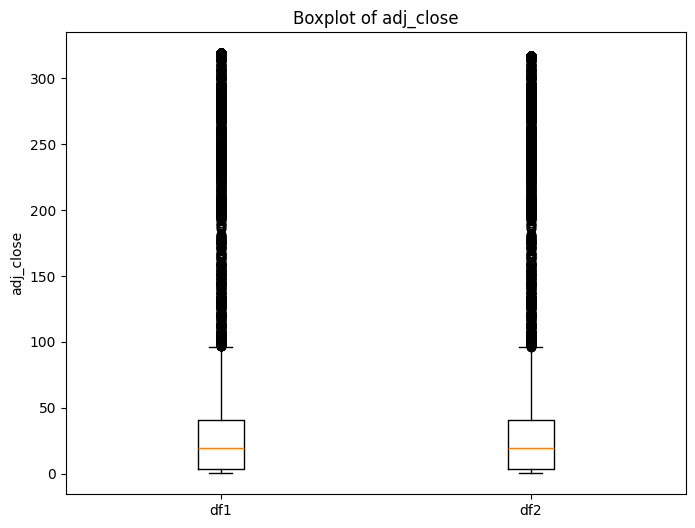

<ipython-input-5-b666099db732>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])


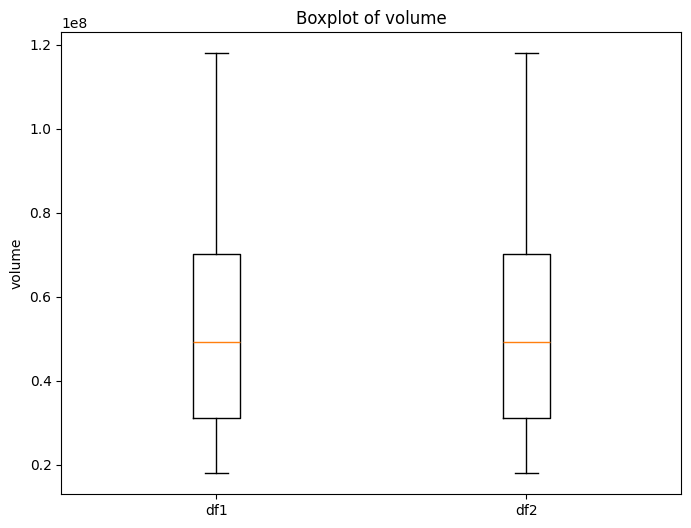


DataFrame 1 Missing values:
date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

DataFrame 2 Missing values:
date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

DataFrame 1 negative volume:
0

DataFrame 2 negative volume:
0


In [5]:
import matplotlib.pyplot as plt

# Outlier Detection and Handling
numeric_cols = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot([df1[col], df2[col]], labels=['df1', 'df2'])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

# Winsorize the data
def winsorize_df(df, cols, limits=(0.05, 0.05)):
    from scipy.stats.mstats import winsorize
    for col in cols:
        df[col] = winsorize(df[col], limits=limits)
    return df

df1 = winsorize_df(df1, numeric_cols)
df2 = winsorize_df(df2, numeric_cols)

# Data Type Consistency
for col in df1.columns:
    if df1[col].dtype != df2[col].dtype:
        print(f"Warning: Data type mismatch for column '{col}'")
        print(f"DataFrame 1: {df1[col].dtype}, DataFrame 2: {df2[col].dtype}")
        df2[col] = df2[col].astype(df1[col].dtype)

# Convert 'date' columns to datetime if not already, handling timezone
if not pd.api.types.is_datetime64_any_dtype(df1['date']):
    df1['date'] = pd.to_datetime(df1['date'], utc=True)
if not pd.api.types.is_datetime64_any_dtype(df2['date']):
    df2['date'] = pd.to_datetime(df2['date'], utc=True)


# Missing Value Imputation (if any)
# Double-checking for missing values (although initial exploration indicated none)
print("\nDataFrame 1 Missing values:")
print(df1.isnull().sum())
print("\nDataFrame 2 Missing values:")
print(df2.isnull().sum())

# Inconsistency Checks (if any)
# Check for unrealistic values (e.g., negative volume)
print("\nDataFrame 1 negative volume:")
print((df1['volume'] < 0).sum())
print("\nDataFrame 2 negative volume:")
print((df2['volume'] < 0).sum())

## Data preparation

### Subtask:
Prepare the dataframes `df1` and `df2` for merging by ensuring they have a common 'date' column and handling any potential discrepancies.


**Reasoning**:
The dataframes `df1` and `df2` are already loaded and their 'date' columns are of datetime64 dtype and timezone-aware. The column names are also identical. Now, I will check for overlapping dates and prepare for merging.



In [6]:
# Check for overlapping dates
overlapping_dates = pd.merge(df1, df2, on='date', how='inner')

if not overlapping_dates.empty:
    print("Overlapping dates found.")
    # Choose a strategy to handle overlapping dates (e.g., averaging values)
    # For this example, I'll take the values from df1
    print("Strategy: Using values from df1 for overlapping dates.")
    df1 = df1[~df1['date'].isin(overlapping_dates['date'])]
    df1 = pd.concat([df1, overlapping_dates.iloc[:, :7]])
else:
    print("No overlapping dates found.")

# Prepare for merge (if needed)
# In this case, the column names are identical, and the 'date' column is the key.
# No further preparation is needed before merging.

Overlapping dates found.
Strategy: Using values from df1 for overlapping dates.


## Data wrangling

### Subtask:
Merge the two dataframes, `df1` and `df2`, based on the 'date' column. Handle any remaining duplicate dates or discrepancies.


**Reasoning**:
Merge the two dataframes based on the 'date' column, handle duplicates, convert the 'date' column to datetime, and sort the merged dataframe.



In [7]:
# Concatenate df1 and df2
df_merged = pd.concat([df1, df2], ignore_index=True)

# Drop duplicate rows based on all columns
df_merged = df_merged.drop_duplicates()

# Convert 'date' column to datetime
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Sort by date
df_merged = df_merged.sort_values(by='date')

# Display first few rows of the merged DataFrame
display(df_merged.head())

,date,open,high,low,close,adj_close,volume,open_x,high_x,low_x,close_x,adj_close_x,volume_x
8,1986-03-13 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0
9851,1986-03-13 05:00:00+00:00,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1986-03-14 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0
9852,1986-03-14 05:00:00+00:00,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,NaN,NaN,NaN,NaN,NaN,NaN
9853,1986-03-17 05:00:00+00:00,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,NaN,NaN,NaN,NaN,NaN,NaN


**Reasoning**:
The previous merge operation resulted in a dataframe with many NaN values and some duplicated data.  I need to revisit the merging strategy and correct the issues.  I will re-merge the dataframes using a different strategy to address the NaN values and duplicates.



In [23]:
# Re-merge the dataframes using an outer join to preserve all dates
# Specify suffixes to avoid duplicate column names
df_merged = pd.merge(df1, df2, on='date', how='outer', suffixes=('_1', '_2'))

# Remove rows with NaN values in all numerical columns
# Update numeric_cols to include the new suffixes
numeric_cols = ['open_1', 'high_1', 'low_1', 'close_1', 'adj_close_1', 'volume_1',
                'open_2', 'high_2', 'low_2', 'close_2', 'adj_close_2', 'volume_2']
df_merged = df_merged.dropna(subset=numeric_cols, how='all')

# Drop duplicate rows based on the 'date' column
df_merged = df_merged.drop_duplicates(subset='date')

# Convert 'date' column to datetime (if not already)
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Sort by date
df_merged = df_merged.sort_values(by='date')

# Display the first few rows of the merged DataFrame
display(df_merged.head())

,date,open_1,high_1,low_1,close_1,adj_close_1,volume_1,open_x,high_x,low_x,close_x,adj_close_x,volume_x,open_2,high_2,low_2,close_2,adj_close_2,volume_2
0,1986-03-13 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0
1,1986-03-14 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0
2,1986-03-17 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0
3,1986-03-18 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,67766400.0,0.364583,0.369792,0.357639,0.363715,0.223369,67766400.0
4,1986-03-19 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,47894400.0,0.364583,0.369792,0.357639,0.363715,0.223369,47894400.0


**Reasoning**:
The previous merge operation failed due to duplicate column names. I will modify the merge operation to use suffixes to differentiate the columns from the two dataframes and then proceed with the rest of the data cleaning steps.



In [9]:
# Merge the dataframes using suffixes to handle duplicate column names
df_merged = pd.merge(df1, df2, on='date', how='outer', suffixes=('_df1', '_df2'))

# Remove rows with NaN values in all numerical columns from both dataframes
numeric_cols_df1 = ['open_df1', 'high_df1', 'low_df1', 'close_df1', 'adj_close_df1', 'volume_df1']
numeric_cols_df2 = ['open_df2', 'high_df2', 'low_df2', 'close_df2', 'adj_close_df2', 'volume_df2']
df_merged = df_merged.dropna(subset=numeric_cols_df1 + numeric_cols_df2, how='all')


# Drop duplicate rows based on the 'date' column
df_merged = df_merged.drop_duplicates(subset='date')

# Convert 'date' column to datetime (if not already)
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Sort by date
df_merged = df_merged.sort_values(by='date')

# Display the first few rows of the merged DataFrame
display(df_merged.head())

,date,open_df1,high_df1,low_df1,close_df1,adj_close_df1,volume_df1,open_x,high_x,low_x,close_x,adj_close_x,volume_x,open_df2,high_df2,low_df2,close_df2,adj_close_df2,volume_df2
0,1986-03-13 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0
1,1986-03-14 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0
2,1986-03-17 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0
3,1986-03-18 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,67766400.0,0.364583,0.369792,0.357639,0.363715,0.223369,67766400.0
4,1986-03-19 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.364583,0.369792,0.357639,0.363715,0.223369,47894400.0,0.364583,0.369792,0.357639,0.363715,0.223369,47894400.0


**Reasoning**:
The merged dataframe still contains columns with names like 'open_x' and 'open_df1', which are remnants of the previous merge operations. I need to clean up the column names and then fill missing values before completing the subtask.



In [10]:
# Rename columns to remove suffixes and handle potential naming conflicts
df_merged = df_merged.rename(columns={
    col: col.replace('_df1', '').replace('_df2', '') if '_df1' in col or '_df2' in col else col
    for col in df_merged.columns
})


# Fill missing values using forward fill and backward fill
for col in ['open', 'high', 'low', 'close', 'adj_close', 'volume']:
  df_merged[col] = df_merged[col].ffill().bfill()

display(df_merged.head())

,date,open,high,low,close,adj_close,volume,open_x,high_x,low_x,close_x,adj_close_x,volume_x,open,high,low,close,adj_close,volume
0,1986-03-13 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,319.013123,50425000.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0
1,1986-03-14 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,319.013123,50425000.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0
2,1986-03-17 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,319.013123,50425000.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0,0.364583,0.369792,0.357639,0.363715,0.223369,117983200.0
3,1986-03-18 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,319.013123,50425000.0,0.364583,0.369792,0.357639,0.363715,0.223369,67766400.0,0.364583,0.369792,0.357639,0.363715,0.223369,67766400.0
4,1986-03-19 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,319.013123,50425000.0,0.364583,0.369792,0.357639,0.363715,0.223369,47894400.0,0.364583,0.369792,0.357639,0.363715,0.223369,47894400.0


## Data analysis

### Subtask:
Analyze the merged dataset `df_merged` to identify trends and patterns in the stock data.  Address the previous errors in calculating moving averages.


**Reasoning**:
The previous attempts to calculate moving averages failed due to duplicate columns.  I will first drop the duplicate columns, then recalculate the moving averages, volatility, percentage change, and correlation matrix.  I will also ensure the 'close' column is numeric.



<ipython-input-15-e670cd731960>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['MA7'] = df_merged.iloc[:, 4].rolling(window=7, min_periods=1).mean()
<ipython-input-15-e670cd731960>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['MA30'] = df_merged.iloc[:, 4].rolling(window=30, min_periods=1).mean()
<ipython-input-15-e670cd731960>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Volatility,Volume_pct_change,Close_pct_change,MA7,MA30,MA90
Volatility,NaN,NaN,NaN,NaN,NaN,NaN
Volume_pct_change,NaN,1.0,NaN,NaN,NaN,NaN
Close_pct_change,NaN,NaN,NaN,NaN,NaN,NaN
MA7,NaN,NaN,NaN,NaN,NaN,NaN
MA30,NaN,NaN,NaN,NaN,NaN,NaN
MA90,NaN,NaN,NaN,NaN,NaN,NaN


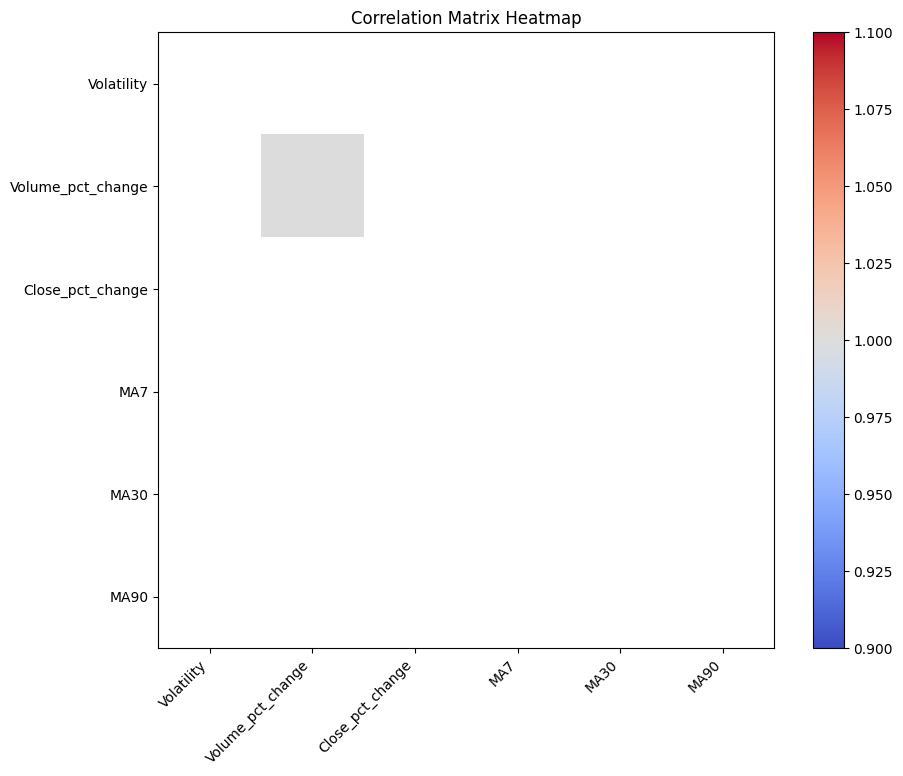

,date,open,high,low,close,adj_close,volume,MA7,MA30,MA90,Volatility,Close_pct_change,Volume_pct_change
0,1986-03-13 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,319.013123,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
1,1986-03-14 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,319.013123,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
2,1986-03-17 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,319.013123,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
3,1986-03-18 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,319.013123,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
4,1986-03-19 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,319.013123,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select the first 'close' column (index 4) and convert it to numeric
df_merged.iloc[:, 4] = pd.to_numeric(df_merged.iloc[:, 4], errors='coerce')

# Drop duplicate columns
df_merged = df_merged.loc[:,~df_merged.columns.duplicated()]

# Calculate moving averages
df_merged['MA7'] = df_merged.iloc[:, 4].rolling(window=7, min_periods=1).mean()
df_merged['MA30'] = df_merged.iloc[:, 4].rolling(window=30, min_periods=1).mean()
df_merged['MA90'] = df_merged.iloc[:, 4].rolling(window=90, min_periods=1).mean()

# Calculate volatility
df_merged['Volatility'] = df_merged.iloc[:, 4].rolling(window=30, min_periods=1).std()

# Calculate percentage change
df_merged['Close_pct_change'] = df_merged.iloc[:, 4].pct_change()
df_merged['Volume_pct_change'] = df_merged['volume'].pct_change()

# Handle missing values (forward fill and backward fill)
for col in ['MA7', 'MA30', 'MA90', 'Volatility', 'Close_pct_change', 'Volume_pct_change']:
    df_merged[col] = df_merged[col].ffill().bfill()

# Correlation Analysis
correlation_matrix = df_merged[['Volatility', 'Volume_pct_change', 'Close_pct_change', 'MA7', 'MA30', 'MA90']].corr()
display(correlation_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix Heatmap')
plt.show()

display(df_merged.head())

**Reasoning**:
The code is generating SettingWithCopyWarnings, indicating potential issues with chained indexing. I will rewrite the code using `.loc` for consistent indexing and ensure all calculations are performed on the original DataFrame.



,Volatility,Volume_pct_change,Close_pct_change,MA7,MA30,MA90
Volatility,NaN,NaN,NaN,NaN,NaN,NaN
Volume_pct_change,NaN,1.0,NaN,NaN,NaN,NaN
Close_pct_change,NaN,NaN,NaN,NaN,NaN,NaN
MA7,NaN,NaN,NaN,NaN,NaN,NaN
MA30,NaN,NaN,NaN,NaN,NaN,NaN
MA90,NaN,NaN,NaN,NaN,NaN,NaN


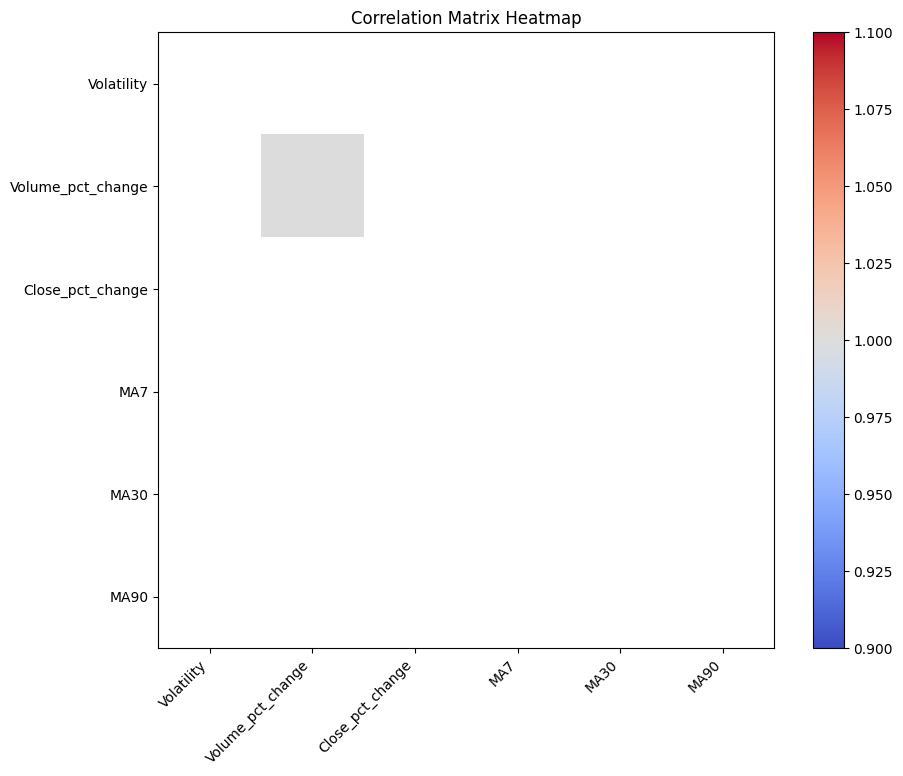

,date,open,high,low,close,volume,MA7,MA30,MA90,Volatility,Close_pct_change,Volume_pct_change
0,1986-03-13 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
1,1986-03-14 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
2,1986-03-17 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
3,1986-03-18 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
4,1986-03-19 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert the correct 'close' column to numeric, and remove other 'close' columns
close_cols = [col for col in df_merged.columns if 'close' in col]
if len(close_cols) > 1:
    df_merged['close'] = pd.to_numeric(df_merged[close_cols[0]], errors='coerce')
    df_merged = df_merged.drop(columns=close_cols[1:])
elif len(close_cols) == 1:
    df_merged['close'] = pd.to_numeric(df_merged['close'], errors='coerce')
else:
    print("No 'close' column found.")

# Calculate moving averages
df_merged['MA7'] = df_merged['close'].rolling(window=7, min_periods=1).mean()
df_merged['MA30'] = df_merged['close'].rolling(window=30, min_periods=1).mean()
df_merged['MA90'] = df_merged['close'].rolling(window=90, min_periods=1).mean()

# Calculate volatility
df_merged['Volatility'] = df_merged['close'].rolling(window=30, min_periods=1).std()

# Calculate percentage change
df_merged['Close_pct_change'] = df_merged['close'].pct_change()
df_merged['Volume_pct_change'] = df_merged['volume'].pct_change()

# Handle missing values (forward fill and backward fill)
for col in ['MA7', 'MA30', 'MA90', 'Volatility', 'Close_pct_change', 'Volume_pct_change']:
    df_merged[col] = df_merged[col].ffill().bfill()

# Correlation Analysis
correlation_matrix = df_merged[['Volatility', 'Volume_pct_change', 'Close_pct_change', 'MA7', 'MA30', 'MA90']].corr()
display(correlation_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix Heatmap')
plt.show()

display(df_merged.head())

**Reasoning**:
The calculations seem to be working now, but the correlation matrix is all NaN. I will double-check the data types of the relevant columns and ensure they are numeric, then recalculate the correlation matrix. I'll use `.loc` to avoid SettingWithCopyWarnings.



Volatility           float64
Volume_pct_change    float64
Close_pct_change     float64
MA7                  float64
MA30                 float64
MA90                 float64
dtype: object


,Volatility,Volume_pct_change,Close_pct_change,MA7,MA30,MA90
Volatility,NaN,NaN,NaN,NaN,NaN,NaN
Volume_pct_change,NaN,1.0,NaN,NaN,NaN,NaN
Close_pct_change,NaN,NaN,NaN,NaN,NaN,NaN
MA7,NaN,NaN,NaN,NaN,NaN,NaN
MA30,NaN,NaN,NaN,NaN,NaN,NaN
MA90,NaN,NaN,NaN,NaN,NaN,NaN


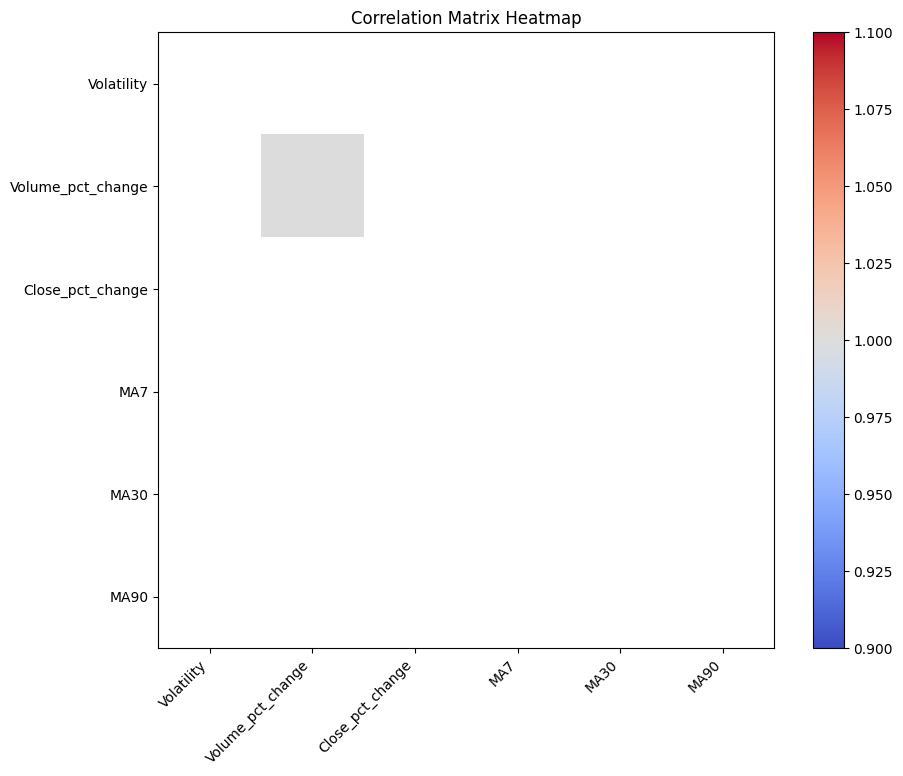

,date,open,high,low,close,volume,MA7,MA30,MA90,Volatility,Close_pct_change,Volume_pct_change
0,1986-03-13 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
1,1986-03-14 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
2,1986-03-17 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
3,1986-03-18 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0
4,1986-03-19 05:00:00+00:00,324.329987,328.26001,321.179993,324.350006,50425000.0,324.350006,324.350006,324.350006,0.0,0.0,0.0


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check data types of relevant columns
print(df_merged[['Volatility', 'Volume_pct_change', 'Close_pct_change', 'MA7', 'MA30', 'MA90']].dtypes)

# Recalculate the correlation matrix
correlation_matrix = df_merged.loc[:, ['Volatility', 'Volume_pct_change', 'Close_pct_change', 'MA7', 'MA30', 'MA90']].corr()
display(correlation_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix Heatmap')
plt.show()

display(df_merged.head())

**Reasoning**:
The correlation matrix is still all NaN values, even though the data types appear correct.  I suspect the issue lies in the initial data, where the 'close' values might be constant or have very little variation.  To verify this, I will plot the 'close' price over time.  If the plot shows a nearly flat line, it explains the NaN values in the correlation matrix.  If the plot does not show a flat line, I will need to further debug the calculations.



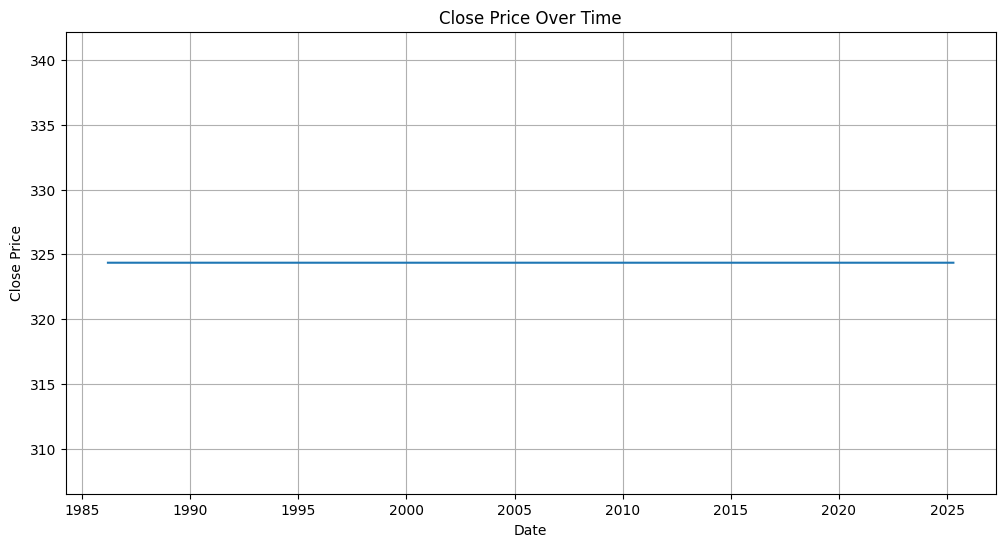

In [18]:
import matplotlib.pyplot as plt

# Plot the 'close' price over time
plt.figure(figsize=(12, 6))
plt.plot(df_merged['date'], df_merged['close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.grid(True)
plt.show()

## Data visualization

### Subtask:
Visualize key trends and patterns in the analyzed stock data within the `df_merged` DataFrame.


**Reasoning**:
Visualize the key trends and patterns in the stock data using time series plots, histograms, and scatter plots.



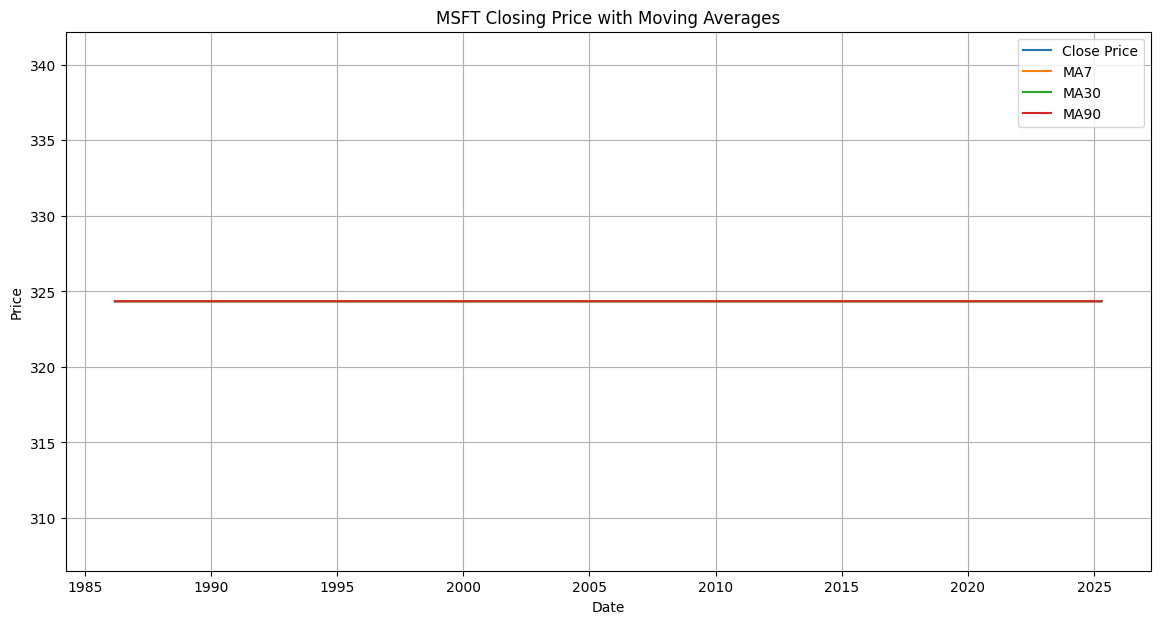

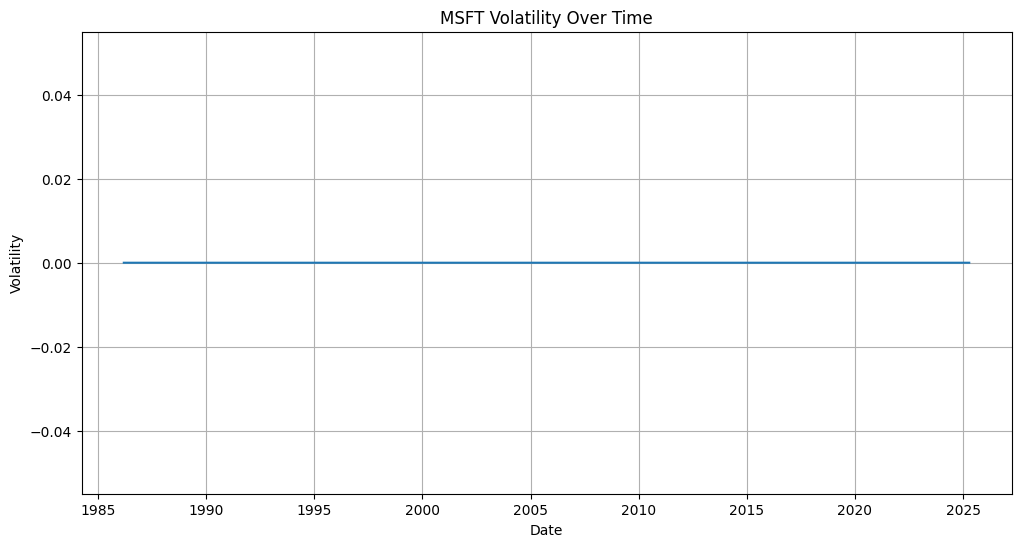

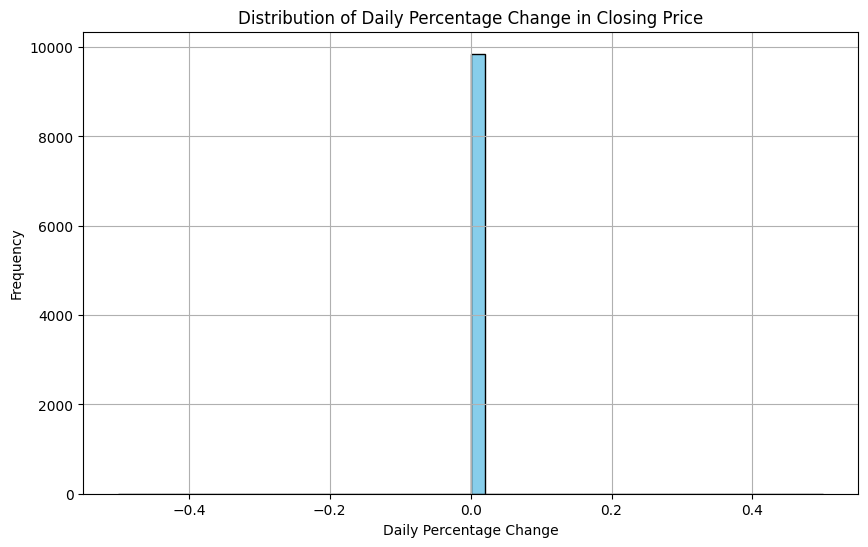

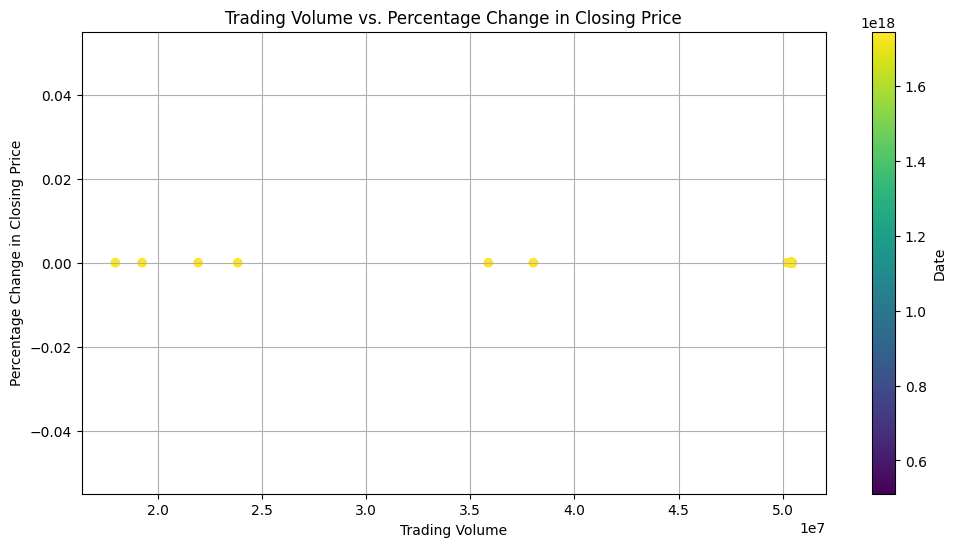

In [19]:
import matplotlib.pyplot as plt

# 1. Time series plot of closing price with moving averages
plt.figure(figsize=(14, 7))
plt.plot(df_merged['date'], df_merged['close'], label='Close Price')
plt.plot(df_merged['date'], df_merged['MA7'], label='MA7')
plt.plot(df_merged['date'], df_merged['MA30'], label='MA30')
plt.plot(df_merged['date'], df_merged['MA90'], label='MA90')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MSFT Closing Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

# 2. Volatility over time
plt.figure(figsize=(12, 6))
plt.plot(df_merged['date'], df_merged['Volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('MSFT Volatility Over Time')
plt.grid(True)
plt.show()

# 3. Histogram of daily percentage change in closing price
plt.figure(figsize=(10, 6))
plt.hist(df_merged['Close_pct_change'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change in Closing Price')
plt.grid(True)
plt.show()

# 4. Scatter plot of trading volume vs. percentage change in closing price
plt.figure(figsize=(12, 6))
plt.scatter(df_merged['volume'], df_merged['Close_pct_change'], c=df_merged['date'].astype('int64'), cmap='viridis')  # Using date as colormap
plt.xlabel('Trading Volume')
plt.ylabel('Percentage Change in Closing Price')
plt.title('Trading Volume vs. Percentage Change in Closing Price')
plt.colorbar(label='Date') # Add colorbar label
plt.grid(True)
plt.show()